In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import display
import time
import copy
import random

In [2]:
# constants
beta = 4

In [3]:
# creating memories
memory_1 = np.ones([10, 10])
memory_2 = np.ones([10, 10])
memory_3 = np.ones([10, 10])
memory_1[3, :] = -1.0
memory_1[:, 3] = -1.0
memory_2[5:7, 5:7] = -1.0
memory_3[0, :] = -1.0
memory_3[9, :] = -1.0
memory_3[:, 0] = -1.0
memory_3[:, 9] = -1.0

In [15]:
# all functions
# add a memory to weight
def weight_update(memory, w):
    for i in range(100):
        for j in range(100):
            w[i, j] += memory[i]*memory[j]
    np.fill_diagonal(w, 0)
    
# inverse of activation function
def f_inverse(firing):
    return np.arctanh(firing)/beta

# activation function
def f(potential):
    return np.tanh(beta*potential)

# time derivative of membrane potential
def derivative(potential, firing, w):
    derivative = np.zeros(100)
    for i in range(100):
        derivative[i] = -potential[i] + np.dot(w[i, :], firing)
    return derivative

# memory recovery simulation
def simulate(dt, timesteps, firing, potential, w, original):
    potential_flat = potential.flatten()
    firing_flat = firing.flatten()
    i = 0
    while i < timesteps:
        potential_flat += dt*derivative(potential_flat, firing_flat, w)
        firing_flat = f(potential_flat)
    return firing_flat
        
# add random memory to weight
def add_random_memory(number, w):
    for i in range(number):
        random_memory = np.random.uniform(-1, 1.0000001, [10, 10])
        random_memory[np.where(random_memory < 0)] = -1.0
        random_memory[np.where(random_memory > 0)] = 1.0
        weight_update(random_memory.flatten(), w)

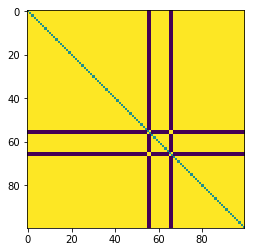

In [8]:
weight_1 = np.zeros([100, 100])
weight_update(memory_2.flatten(), weight_1)
plt.imshow(weight_1)
plt.show()

In [12]:
memory_2_corrupt = copy.deepcopy(memory_2)
memory_2_corrupt[3:7,:] = np.random.uniform(-1, 1, [4, 10])
memory_2_potential = f_inverse(0.9*memory_2_corrupt)

In [ ]:
# recover memory 2 50 times
data_matrix = np.zeros([50, 100])
for i in range(50):
    final_state = simulate(0.001, 30, memory_2_corrupt, memory_2_potential, weight_1, memory_2)
    data_matrix[i, :] = final_state

All the memories eventually return to the correct memory.

In [ ]:
# Adding random memory to weight
weight_2 = copy.deepcopy(weight_1)
add_random_memory(13, weight_2)
plt.imshow(weight_2)
plt.show()

In [ ]:
# recover memory 1 with new weight
simulate(0.005, 50, memory_1_corrupt, memory_1_potential, weight_2, memory_1)

In [ ]:
# recover memory 1 with new weight
simulate(0.01, 50, memory_2_corrupt, memory_2_potential, weight_2, memory_2)

In [ ]:
# recover memory 3 with new weight
simulate(0.0025, 50, memory_3_corrupt, memory_3_potential, weight_2, memory_3)